In [25]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
def load_data(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'hemingway':
            label = 1
        else:
            label = 0

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [27]:
def load_just_hemingway_and_steinbeck(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        if subfolder == 'fitzgerald':
            continue
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'hemingway':
            label = 0
        else:
            label = 1

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [28]:
text_data, labels = load_just_hemingway_and_steinbeck('/Users/spicy.kev/Documents/github/fitzgerald_hemingway/data')
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text_data', 'label'])

X = df['text_data']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Processing file: steinbeck_of_mice.txt
Processing file: steinbeck_the_red_pony.txt
Processing file: steinbeck_grapes.txt
Processing file: steinbeck_east_of_eden.txt
Processing file: steinbeck_cannery_row.txt
Processing file: steinbeck_the_pearl.txt
Processing file: hemingway_collected_stories.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_ten_poems.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_men_without_women.txt


In [29]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
Name: label, dtype: int64

In [30]:
# Train a Linear SVM model
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)     

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0])

In [32]:
# Evaluate the model on the testing set
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=['hemingway', 'steinbeck']))

accuracy 0.5
              precision    recall  f1-score   support

   hemingway       0.50      1.00      0.67         3
   steinbeck       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/Users/spicy.kev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/spicy.kev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/spicy.kev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


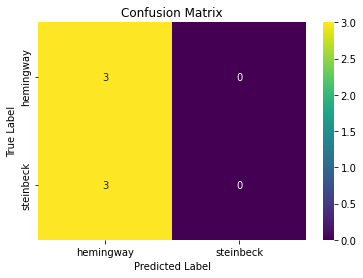

In [33]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a list of class labels
classes = ['hemingway', 'steinbeck']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Define a new text sample to classify—Hemingway's "The Snows of Kilimanjaro"
with open('/Users/spicy.kev/Documents/github/fitzgerald_hemingway/test_data/steinbeck_in_dubious_battle.txt') as f:
    new_text =  f.read()
vectorizer = CountVectorizer()
# Transform the new text sample into a bag-of-words representation
new_counts = vectorizer.fit_transform([new_text])

# Use the trained model to predict the label of the new text sample
new_pred = sgd.predict([new_text])

# Print the predicted label
if new_pred == 1:
    print("The model predicts that this text is by Hemingway ...")
else:
    print("The model predicts that this text is by Steinbeck ...")

The model predicts that this text is by Steinbeck ...
